# Masterclass Unsupervised analysis 
## Hands-on: Embeddings on continuous sensor data
#### Rijkswaterstaat | Datalab 

PCA and other embeddings are extremely usefull for visualizing a high-dimensional dataset in 2D for understanding its intrinsic structure. In this notebook we will use existing data sets, and experiment with various dimensionality reduction techniques and embeddings, such as Principal Component Analysis (PCA), t-SNE. In addition we will analyze the "goodness" of high-dimensionality reduction.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install tqdm
# !pip install pca

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pca import pca
from sklearn.manifold import TSNE
print(os.getcwd())

D:\GITLAB\MASTERCLASS\embeddings\notebooks


### EXERCISE
Lets try again but now on real data
Load a real cancer data from The Cancer Genome Atlas (TCGA). This dataset contains tens of thousands of features (genes), and over 4000 human cancer samples.
Your goal is to determine the relationships of different human-samples and their cancer-types.

#### Wat is de onderliggende data verdeling?

#### Experimenteer met de onderstaande stappen en bekijken de resultaten van de PCA.
<br><b>Step 1: Ignore the data distribution</b>
<b><br>Step 2: Transform the data in such a way that it follows gaussian (normal-like distribution)</b>
<b><br>Step 3: Transform the data (as in step 2), then remove features by feature-selection</b>

<i> For both cases, use the most suitable distance metric and linkage type</i>
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html


In [4]:
# large dataset
# https://we.tl/t-p997hAVngs

# Small dataset
# https://we.tl/t-Su9UHMnOD7

# from google.colab import files
# uploaded = files.upload()
# import io
# X = pd.read_csv(io.BytesIO(uploaded),compression='zip', sep=';')
X = pd.read_csv('../data/TCGA_small.zip',compression='zip', sep=';')


In [ ]:
# Sensor dataset from The Cancer Genome Atlas.
X.reset_index(drop=True, inplace=True)
X.index = X['cancer'].values

del X['cancer']
del X['os']
del X['osi']
del X['age']
del X['sex']
del X['cancer.1']

In [6]:
X.values = X.values.astype(float)

,a1bg-as1,a1cf,a2m,a2ml1,a4galt,a4gnt,aaas,aacs,aacsp1,aadac,...,zwint,zxda,zxdb,zxdc,zyg11a,zyg11b,zyx,zzef1,zzz3,cancer.1
acc,16.892,0.0000,10374.0,54.7550,190.680,0.000,2225.3,1266.10,0.0000,0.0000,...,146.970,20.653,351.59,1050.90,0.4803,648.41,1841.0,1157.50,596.06,acc
acc,17.104,0.0000,9844.9,0.0000,198.900,0.000,1509.5,981.61,0.4026,1.2079,...,438.460,57.173,279.02,2979.90,31.4050,1166.00,3060.0,1896.00,801.64,acc
acc,19.345,0.5925,7201.8,1.7775,75.248,2.370,1259.7,5182.00,0.0000,107.2400,...,190.190,39.698,495.33,914.83,0.5925,806.40,2655.6,1482.40,437.27,acc
acc,84.971,0.0000,14473.0,0.0000,1032.800,0.000,2391.1,3145.50,0.9634,1942.2000,...,285.160,33.719,263.01,984.59,0.0000,881.50,2318.9,475.92,491.33,acc
acc,149.110,0.0000,3253.0,50.8320,523.270,1.495,1556.3,1091.40,0.7475,36.6290,...,55.317,30.648,346.10,861.15,0.0000,843.95,1287.2,935.90,396.19,acc


In [15]:
X.head()

,a1bg-as1,a1cf,a2m,a2ml1,a4galt,a4gnt,aaas,aacs,aacsp1,aadac,...,zwilch,zwint,zxda,zxdb,zxdc,zyg11a,zyg11b,zyx,zzef1,zzz3
acc,16.892,0.0000,10374.0,54.7550,190.680,0.000,2225.3,1266.10,0.0000,0.0000,...,183.960,146.970,20.653,351.59,1050.90,0.4803,648.41,1841.0,1157.50,596.06
acc,17.104,0.0000,9844.9,0.0000,198.900,0.000,1509.5,981.61,0.4026,1.2079,...,264.130,438.460,57.173,279.02,2979.90,31.4050,1166.00,3060.0,1896.00,801.64
acc,19.345,0.5925,7201.8,1.7775,75.248,2.370,1259.7,5182.00,0.0000,107.2400,...,90.653,190.190,39.698,495.33,914.83,0.5925,806.40,2655.6,1482.40,437.27
acc,84.971,0.0000,14473.0,0.0000,1032.800,0.000,2391.1,3145.50,0.9634,1942.2000,...,106.730,285.160,33.719,263.01,984.59,0.0000,881.50,2318.9,475.92,491.33
acc,149.110,0.0000,3253.0,50.8320,523.270,1.495,1556.3,1091.40,0.7475,36.6290,...,109.820,55.317,30.648,346.10,861.15,0.0000,843.95,1287.2,935.90,396.19


<h2>Principal Component Analysis</h2>
<h3>The algorithm</h3>

Principal component analysis (PCA) involves a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

<br><b>Objectives of principal component analysis</b>
<br>•	1. To reduce the dimensionality
<br>•	2. To discover/explore the data set.
<br>•	3. To identify new meaningful underlying variables.



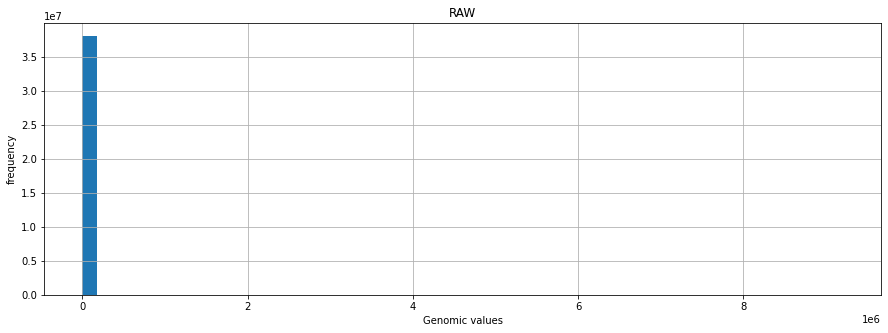

In [16]:
# First, have a look at the emperical data and the distribution, what do you observe?
fig,ax1=plt.subplots(figsize=(15,5))

# Plot the data distribution
ax1.hist(X.values.flatten(), bins=50)
ax1.set_ylabel('frequency')
ax1.set_xlabel('Genomic values')
ax1.set_title('RAW')
ax1.grid(True)

#### We can start with either, filtered data or if you are not sure, the full dataset.
Reduce the dimensionality to 2 dimensions and plot the first two principle components and why are the first principle components more important than the last ones?


In [17]:
# Bij een getal tussen [0-1] gaat de library het aantal PCs ondervangen dat n_components vd variantie kan verklaren. 
# In dit voorbeeld is dat 95%.
# Als n_components wordt ingesteld met waarde >1 dan wordt de data aantal PC gebruikt en daar hoort dan weer een bepaalde explaiend variantie bij.

# Initializatie
modelr = pca(n_components=0.95)
# Fit transform
results = modelr.fit_transform(X)

[pca] >The PCA reduction is performed on the [18881] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [39] that covers the [95.00%] explained variance.


### Wat is er allemaal opgeslagen aan informatie in "model"?


In [18]:
# De variable results bevat de resultaten
print(results.keys())

# Exact dezelfde results staat ook opgeslagen in het object zelf
modelr.results.keys()

dict_keys(['loadings', 'PC', 'explained_var', 'model', 'pcp', 'topfeat'])


dict_keys(['loadings', 'PC', 'explained_var', 'model', 'pcp', 'topfeat'])

#### De Principal Components 

De rijen zijn de samples en de features zijn nog gecomprimeerd in de PCs. 
De PCs is nu de nieuwe feature ruimte.
Je kan nu dus heel makkelijk de samples plotten over de PC1 en PC2 of andere combinaties van PCs. 


In [19]:
modelr.results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
acc,-285383.574699,-27457.968106,-96785.353637,2831.563921,70332.118617,35149.260439,-60842.992037,352566.865789,-218450.410647,-13085.573016,...,34465.003127,-9983.472645,-6996.463263,5191.811115,235.472957,-24436.001398,-13045.480752,-18862.879563,-5322.360865,4424.092252
acc,-285707.621060,-24142.792516,-102426.679008,-5637.674750,93934.370061,45195.474974,-39183.640937,354337.432247,-253745.418954,-20722.167207,...,30441.438516,-1903.097504,17071.067265,-23953.554226,45.901561,-66257.126050,-32109.343699,-88883.698617,55740.596221,-36990.611169
acc,-268157.432429,11678.311736,-78354.676290,-93.652364,54492.779865,16256.160905,-102144.660511,124565.345307,-110634.877561,-13238.084566,...,55661.775362,43047.300912,100425.232407,-66961.566313,69877.172830,-174567.943590,-52074.275984,-277539.195801,109970.798569,-104129.557965
acc,-267376.718669,10363.498644,-86108.125949,7591.801479,58452.017651,18809.751269,-77099.648311,11263.453621,-70182.354314,4257.274317,...,84124.322559,37792.677195,59593.288288,-7217.622159,12740.587302,-85411.891989,-44775.431619,-87585.959181,32201.457751,-38203.687099
acc,-277625.849914,-24443.433630,-83536.849518,15916.955736,57337.093058,1039.454369,-63671.619208,233555.133349,-130990.150973,11971.573107,...,4584.261850,-9036.228137,27830.522185,-17029.292977,29207.502229,-52861.526597,8092.860039,-15829.800796,-12796.783928,-8709.260387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca,-286511.863625,-20335.589894,-55778.439470,-29680.126942,43235.674896,-72101.617361,-1317.351817,5088.581653,22291.292453,4186.942805,...,21577.043952,22698.621997,-26901.411295,936.354246,-2635.000354,-18514.503245,-27210.292204,-15933.127434,5001.529157,7515.152385
brca,-292496.887143,-32089.529001,52083.525791,-30196.254160,45882.337363,-43847.490998,-13588.503800,-11270.184471,4851.087220,-57621.020960,...,36255.141248,-81.500096,-44661.523681,29171.778695,12510.702936,-63519.148200,46994.155499,-7030.694438,37586.268354,-24148.427438
brca,-290496.654567,-30614.153098,-48808.923519,-21635.987152,83419.230659,-144655.153808,222501.774501,-5119.987289,-47595.285220,123065.227404,...,4740.774474,5116.281448,-20853.348581,-6316.971385,-33953.985997,-35657.101741,-18717.610467,-16628.726930,2948.200323,14465.415910
brca,-294311.063003,-56733.209190,127118.881138,-16100.698815,114954.665907,-159673.102912,340021.955249,-49488.821001,-81581.107097,135544.485470,...,4341.029401,55689.057814,23010.658253,55161.082150,16130.721525,24717.848677,14859.838875,28307.278503,35395.673630,-403.607068


#### Components vs explained variance
Als input voor het model is er ingesteld om het aantal PCs te ondervangen dat 95% van de variantie verklaard.
Deze informatie kan je onderstaand terug vinden.


In [20]:
# Aantal components.
print(modelr.n_components)

# Aantal percentage explained variance voor n_components
print(modelr.results['pcp'])

39
0.95


#### Explained variance voor de PCs

In [21]:
# De cumulative explained variance voor de PCs.
# PC1 verklaart ongeveer 47% vd veriantie en PC1+PC2=58% en PC1+PC2+PC3=62% etc
modelr.results['explained_var']

array([0.65726523, 0.71370902, 0.75773532, ..., 0.99999995, 1.        ,
       1.        ])

In [22]:
# Explained variance maar niet cumulatief, dus per PC.
PCA = modelr.results['model']
PCA.explained_variance_ratio_[0:10]

array([0.65726523, 0.05644379, 0.0440263 , 0.02437934, 0.02193689,
       0.01762442, 0.01263396, 0.01109374, 0.00947248, 0.00844221])

In [23]:
# Het gefitte pca model, afkomstig uit sklearn. Hier kan nog andere informatie uit gehaald worden indien gewenst.
PCA = modelr.results['model']
# dir(PCA)

In [24]:
# Ranking van de top verklarende features gebasseerd op de loadings.
# alb, hp en serpina zijn het meest verklarend.
modelr.results['topfeat'].head()

,PC1_weights,PC2_weights
alb,0.878890,-0.449165
hp,0.251611,0.549217
serpina1,0.221369,0.419255
fga,0.135575,0.257720
c3,0.102660,0.151649


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1893b2376a0>)

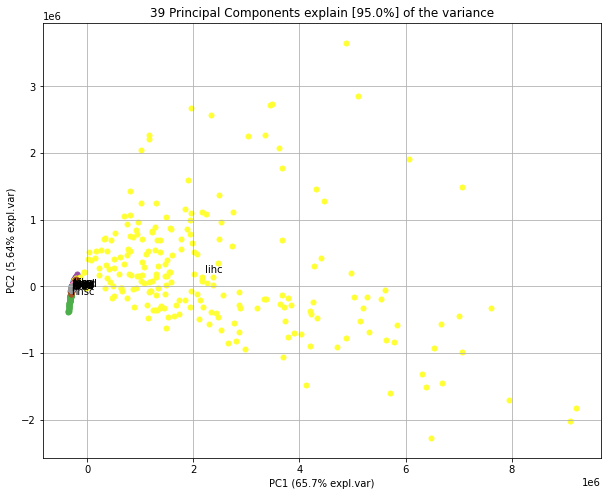

In [25]:
# Make plots
# Deze plot ziet er sterk vervormd uit en de samples zijn extreem geclutterd.
modelr.scatter(figsize=(10,8))

### Plot de explained variance.

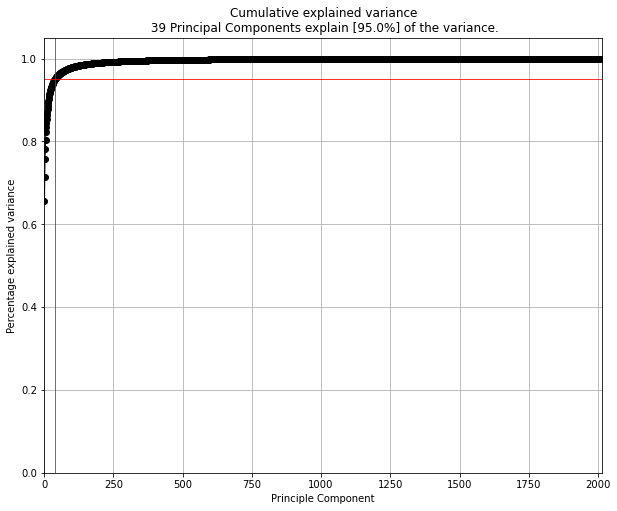

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1893b28c208>)

<Figure size 432x288 with 0 Axes>

In [26]:
modelr.plot(figsize=(10,8))

#### Plot de features met de loadings om te verklaren welke features de variantie bezitten en dus de spreiding verzorgen 

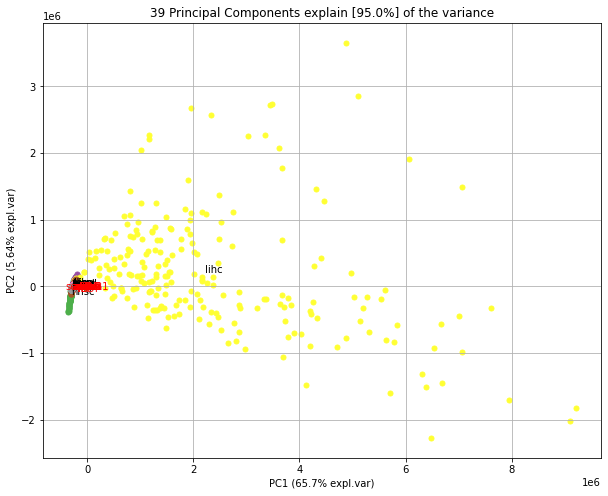

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1893b31a4a8>)

In [27]:
modelr.biplot(n_feat=20, figsize=(10,8))

#### Hoe kunnen we ervoor zorgen dat de samples beter verdeeld worden door de ruimte?
Hint: Wat is de onderliggende data verdeling en onder welke aanname voeren wij de PCA uit?

[A] : PCA is niet parameterisch

[B] : PCA werkt onder de aanname dat de data normaal verdeeld is

#### Normalize de exponentional data naar gausian-like data
Hieronder is een zero-mean normalizatie uitgevoerd. In sklearn is dit:

X = preprocessing.scale(X, with_mean=True, with_std=False, axis=0)

Wil je over de rijen of kolommen normalizeren?


In [28]:
# In dit scenario willen we per feature, over alle samples (aka de classes) normalizeren. Dus per kolom.
# Als we het per sample zouden doen, dan zou de verdeling van iedere feature naar gemiddeld 0 getrokken worden en daardoor komen de classes bovenop elkaar te liggen.

Xnorm = np.log2(X+1)
rowmeans = np.mean(Xnorm, axis=0)
for i in tqdm(range(Xnorm.shape[1])):
    Xnorm.iloc[:,i] = Xnorm.values[:,i] - rowmeans[i]


100%|█████████████████████████████████████████████████████| 18881/18881 [00:42<00:00, 441.67it/s]


In [29]:
Xnorm.head()

,a1bg-as1,a1cf,a2m,a2ml1,a4galt,a4gnt,aaas,aacs,aacsp1,aadac,...,zwilch,zwint,zxda,zxdb,zxdc,zyg11a,zyg11b,zyx,zzef1,zzz3
acc,-1.747878,-2.237487,0.243609,1.787775,-1.035235,-1.187524,1.388199,0.829182,-1.573760,-3.691181,...,-0.671023,-1.274118,-1.146899,-0.088860,-0.103727,-3.110536,-0.401777,-1.081959,0.115281,-0.174215
acc,-1.730884,-2.237487,0.168093,-4.013254,-0.974657,-1.187524,0.828577,0.462343,-1.085656,-2.548506,...,-0.151537,0.296309,0.278883,-0.421322,1.399024,1.341719,0.443826,-0.349229,0.826743,0.252662
acc,-1.562518,-1.566194,-0.282873,-2.539468,-2.365164,0.565225,0.567776,2.861439,-1.573760,3.066909,...,-1.683983,-0.904415,-0.236508,0.404448,-0.303572,-3.005133,-0.087623,-0.553651,0.471931,-0.620271
acc,0.516657,-2.237487,0.723961,-4.013254,1.395950,-1.187524,1.491828,2.141400,-0.600406,7.233038,...,-1.450817,-0.322600,-0.465741,-0.506259,-0.197665,-3.676426,0.040690,-0.749169,-1.165158,-0.452465
acc,1.320755,-2.237487,-1.429216,1.682517,0.416375,0.131516,0.872598,0.615153,-0.768468,1.542592,...,-1.410018,-2.667780,-0.599352,-0.111500,-0.390713,-3.676426,-0.022040,-1.597875,-0.191010,-0.762261


**Make sure you know what you are dealing with. Plot the distribution.**

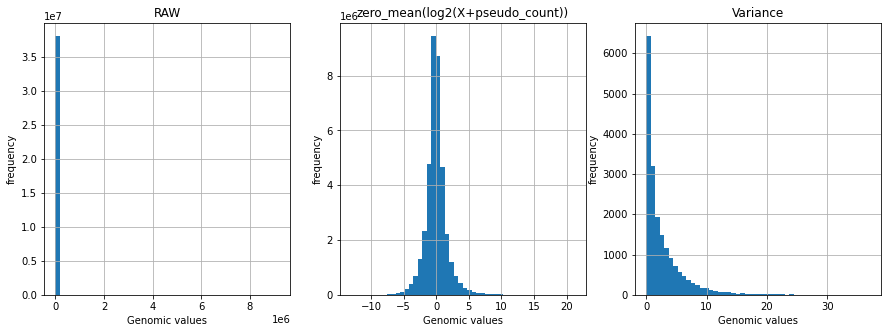

In [30]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(15,5))

# Plot the data distribution
ax1.hist(X.values.flatten(), bins=50)
ax1.set_ylabel('frequency')
ax1.set_xlabel('Genomic values')
ax1.set_title('RAW')
ax1.grid(True)

# Plot the data distribution
ax2.hist(Xnorm.values.flatten(), bins=50)
ax2.set_ylabel('frequency')
ax2.set_xlabel('Genomic values')
ax2.set_title('zero_mean(log2(X+pseudo_count))')
ax2.grid(True)

# Featue reductie door selectie by variance.
feat_var = np.var(Xnorm, axis=0)

# Plot the variance over the features
ax3.hist(feat_var.values, bins=50)
ax3.set_ylabel('frequency')
ax3.set_xlabel('Genomic values')
ax3.set_title('Variance')
ax3.grid(True)

In [31]:
# Initializatie
model = pca(n_components=0.95)
# Fit transform
results = model.fit_transform(Xnorm)

[pca] >The PCA reduction is performed on the [18881] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [864] that covers the [95.00%] explained variance.


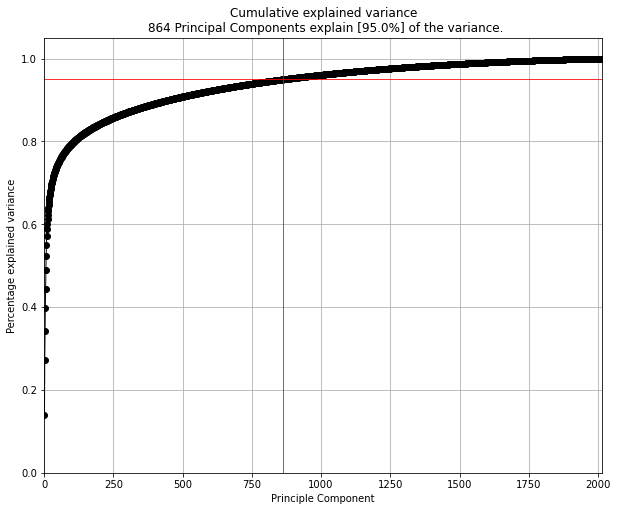

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18785070eb8>)

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot de explained variance
model.plot(figsize=(10,8))

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x187850829e8>)

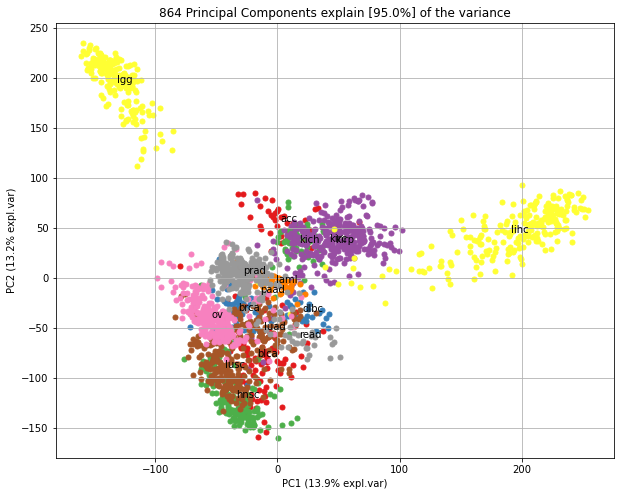

In [33]:
# Make plots
model.scatter(figsize=(10,8))

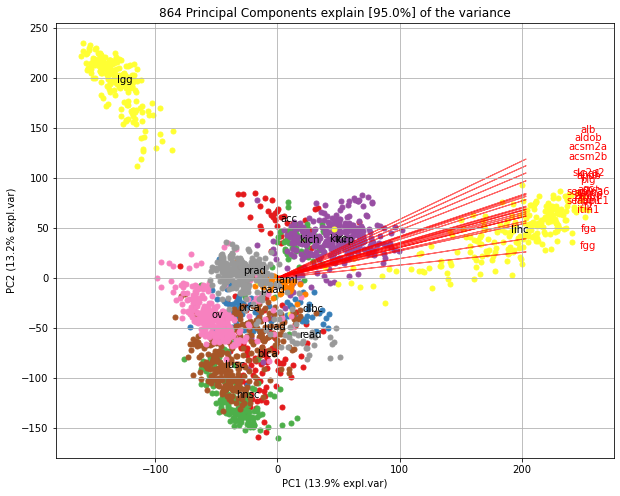

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1878686c5c0>)

In [34]:
model.biplot(n_feat=20, figsize=(10,8))

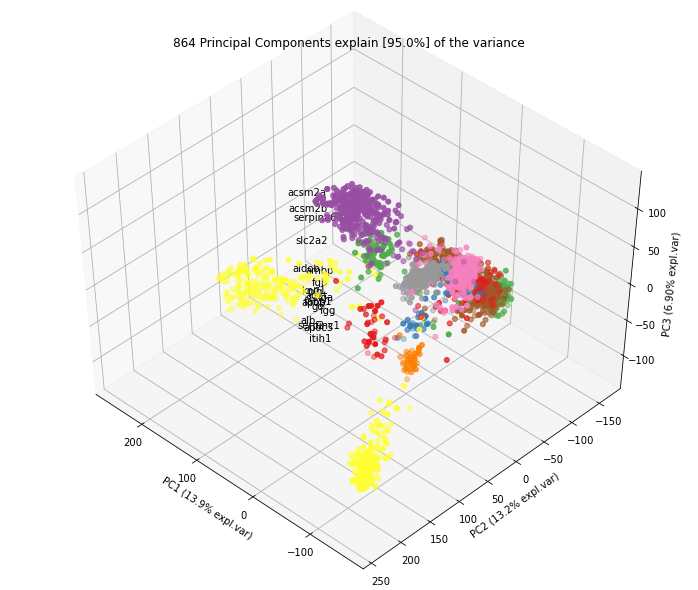

(<Figure size 720x576 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1878e21ae48>)

In [35]:
# model.scatter3d(figsize=(10,8))
model.biplot3d(n_feat=20, figsize=(10,8))

#### Select top discriminating features
Features met weinig variatie hebben in potentie weinig "aanvullende" informatie. 
Denk bijvoorbeeld aan een feature waarvan de waardes constant 0 zijn over de verschillende classes.

In [38]:
# Reduceer de dataset met features die veel variatie hebben.
minvar = 5
Iloc = feat_var>minvar
Xsel = Xnorm.loc[:,Iloc]

In [39]:
print('>Number of features original: %d' %(Xnorm.shape[1]))
print('>Number of features after feature selection: %d' %(Xsel.shape[1]))

>Number of features original: 18881
>Number of features after feature selection: 3205


#### Hoeveel PC components verwacht je terug te krijgen?

In [40]:
# Initializatie
modelsel = pca(n_components=0.95, normalize=False)
# Fit transform
results = modelsel.fit_transform(Xsel)

[pca] >The PCA reduction is performed on the [3205] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [584] that covers the [95.00%] explained variance.


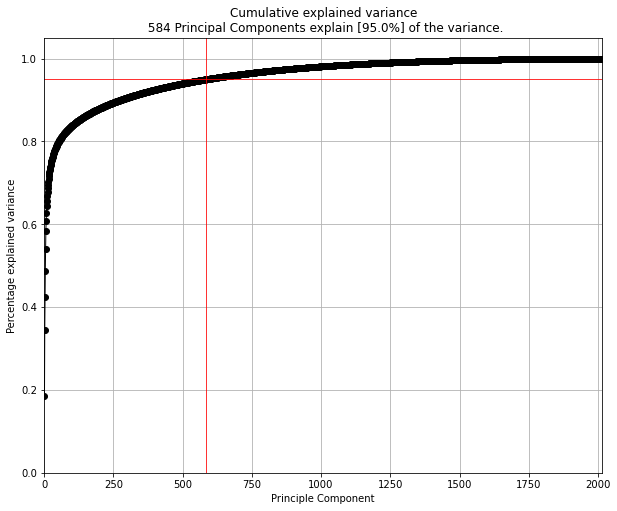

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x187979d9dd8>)

<Figure size 432x288 with 0 Axes>

In [41]:
# Make plots
modelsel.plot(figsize=(10,8))

#### Om nieuwe inzichten te krijgen in de features, kunnen we naar de loadings kijken. Plot the loadings. Wat betekend dit?

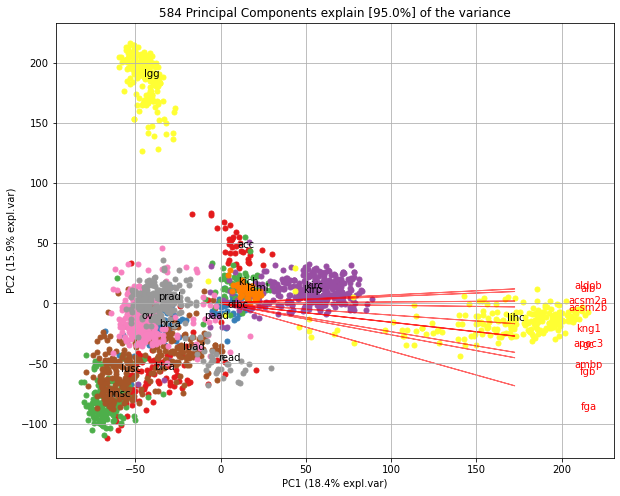

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x187977c7b00>)

In [42]:
# Maak scatter met de feature loadings. Totaal aantal captured variance is 1 en de PC1 bevat ongeveer 21%.
# modelsel.scatter(figsize=(10,8))
modelsel.biplot(n_feat=10, figsize=(10,8))

In [43]:
modelsel.results['topfeat'].head(10)

,PC1_weights,PC2_weights
alb,0.069117,0.002172
fgb,0.066979,-0.010095
fga,0.065024,-0.015292
ambp,0.064355,-0.009094
aldob,0.062847,0.002652
acsm2a,0.062466,0.000404
gc,0.061645,-0.006102
acsm2b,0.061082,-0.000679
apoc3,0.060562,-0.006057
kng1,0.060248,-0.003790


#### Wat zou een goed aantal PCs zijn om de dimensie te reduceren?

In [44]:
print(modelsel.results['explained_var'])
# print(modelsel.results['pcp'])
# print(modelsel.n_components)


[0.18485277 0.34450695 0.42496485 ... 0.99999838 1.         1.        ]


##### Plot the first 2th and 3nd principle components. Why do you observe?

In [45]:
# modelsel.results['PC']['PC2']
# modelsel.results['PC']['PC3']
# plt.scatter(x,y)

<hr>
<h2>tSNE</h2>
<h3>The algorithm</h3>

<br><b>Objectives of tSNE</b>
<br>•	1. To reduce the dimensionality
<br>•	2. To discover/explore the data set.



In [46]:
X_embedded = TSNE(n_components=2, verbose=3).fit_transform(Xsel)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2014 samples in 6.465s...
[t-SNE] Computed neighbors for 2014 samples in 117.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2014
[t-SNE] Computed conditional probabilities for sample 2000 / 2014
[t-SNE] Computed conditional probabilities for sample 2014 / 2014
[t-SNE] Mean sigma: 34.265367
[t-SNE] Computed conditional probabilities in 0.626s
[t-SNE] Iteration 50: error = 66.8635101, gradient norm = 0.1373812 (50 iterations in 3.219s)
[t-SNE] Iteration 100: error = 59.5478554, gradient norm = 0.0907172 (50 iterations in 2.879s)
[t-SNE] Iteration 150: error = 58.0666809, gradient norm = 0.0699989 (50 iterations in 2.715s)
[t-SNE] Iteration 200: error = 56.9891853, gradient norm = 0.0870547 (50 iterations in 2.559s)
[t-SNE] Iteration 250: error = 56.4449539, gradient norm = 0.0664733 (50 iterations in 2.487s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.444954
[t-SNE] Iteration 300: e

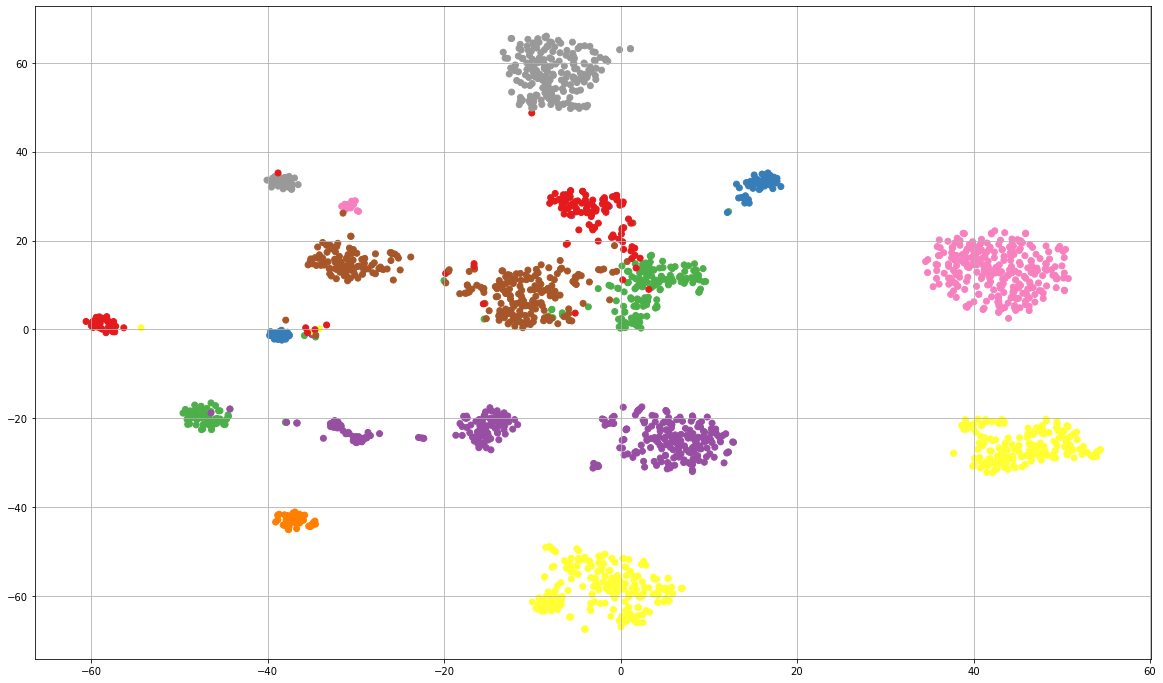

In [60]:
import colourmap
c=colourmap.fromlist(Xsel.index.values)[0]
plt.figure(figsize=(20,12))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=c)
plt.grid(True)

##### The best possible tSNE can be derived by running it e.g., 1000x and then taking the one with lowest divergence (error)